In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import itertools
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("dataset/compressed_news.csv")

In [3]:
df

,Unnamed: 0,title,text,label
0,9957,"American Dream, Revisited",Will Trump pull a Brexit times ten? What would...,FAKE
1,7596,Clintons Are Under Multiple FBI Investigations...,Clintons Are Under Multiple FBI Investigations...,FAKE
2,8905,The FBI Can’t Actually Investigate a Candidate...,Dispatches from Eric Zuesse This piece is cros...,FAKE
3,8752,Confirmed: Public overwhelmingly (10-to-1) say...,Print \n[Ed. – Every now and then the facade c...,FAKE
4,7804,Nanny In Jail After Force Feeding Baby To Death,Nanny In Jail After Force Feeding Baby To Deat...,FAKE
...,...,...,...,...
1262,10128,Tennessee Children with Brittle Bones Suffer i...,Tennessee Children with Brittle Bones Suffer i...,FAKE
1263,909,"Closed primaries, 'warped' democracy?",Political parties choose their presidential no...,REAL
1264,3970,A liberal plan to defeat ISIS: Here’s how we a...,The Islamist terrorist attacks that took place...,REAL
1265,4782,"Nobody Won the VP Debate, Least of All the Ame...",About 90 minutes before the vice-presidential ...,REAL


In [4]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.25, random_state = 9)

In [6]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

# Support Vector Machine

In [7]:
svc = LinearSVC()
svc.fit(tfidf_train, y_train)

LinearSVC()

In [8]:
y_pred_SVM = svc.predict(tfidf_test)
score_SVM = accuracy_score(y_test, y_pred_SVM)
print(f'Accuracy: {round(score_SVM*100,2)}%')

Accuracy: 93.69%


In [9]:
y_pred_SVM

array(['FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL',
       'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE',
       'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE',
       'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL', 'REAL',
       'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE',
       'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE',
       'FAKE', 'REAL', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'FAKE', 'FAKE',
       'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL',
       'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE',
       'REAL', 'REAL', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'REAL', 'REAL',
       'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL', 'REAL',
       'REAL', 'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL',
       'FAKE', 'REAL', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE', 'FAKE',
      

In [10]:
print(confusion_matrix(y_test, y_pred_SVM))
print('\n')
print(classification_report(y_test, y_pred_SVM))

[[144   6]
 [ 14 153]]


              precision    recall  f1-score   support

        FAKE       0.91      0.96      0.94       150
        REAL       0.96      0.92      0.94       167

    accuracy                           0.94       317
   macro avg       0.94      0.94      0.94       317
weighted avg       0.94      0.94      0.94       317



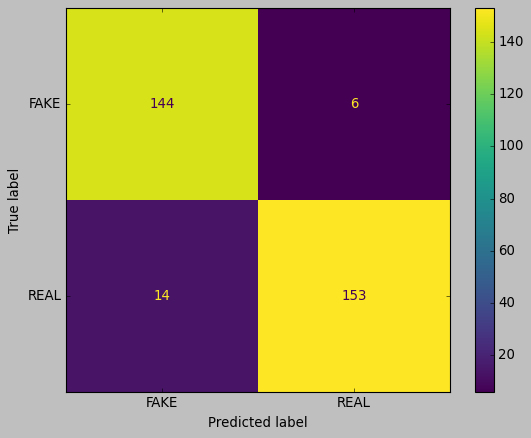

In [11]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred_SVM, labels = svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc.classes_)
disp.plot()

# Logistic Regression

In [12]:
model = LogisticRegression(solver = 'liblinear', random_state = 0)
model.fit(tfidf_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
y_pred_LR = model.predict(tfidf_test)
score_LR = accuracy_score(y_test, y_pred_LR)
print(f'Accuracy: {round(score_LR*100,2)}%')

Accuracy: 91.8%


In [14]:
print(confusion_matrix(y_test, y_pred_LR))
print('\n')
print(classification_report(y_test, y_pred_LR))

[[145   5]
 [ 21 146]]


              precision    recall  f1-score   support

        FAKE       0.87      0.97      0.92       150
        REAL       0.97      0.87      0.92       167

    accuracy                           0.92       317
   macro avg       0.92      0.92      0.92       317
weighted avg       0.92      0.92      0.92       317



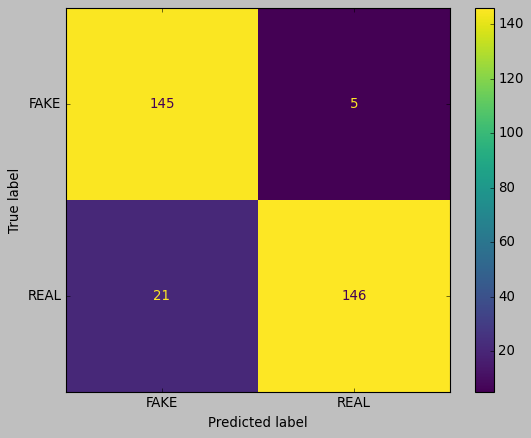

In [15]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred_LR, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()

# Decision Tree

In [16]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(tfidf_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
y_pred_DT = classifier.predict(tfidf_test)
score_DT = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {round(score_DT*100,2)}%')

Accuracy: 79.18%


In [18]:
print(confusion_matrix(y_test, y_pred_DT))
print('\n')
print(classification_report(y_test, y_pred_DT))

[[116  34]
 [ 32 135]]


              precision    recall  f1-score   support

        FAKE       0.78      0.77      0.78       150
        REAL       0.80      0.81      0.80       167

    accuracy                           0.79       317
   macro avg       0.79      0.79      0.79       317
weighted avg       0.79      0.79      0.79       317



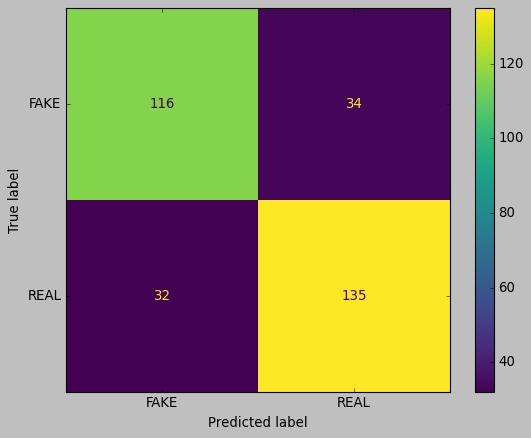

In [19]:
style.use('classic')
cm = confusion_matrix(y_test, y_pred_DT, labels = classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()